OLUYORI OLUWAGBEMIGA BENJAMIN
R00224871

CAT/DOG IMAGES CLASSIFIER

In [1]:
#importing the libraries
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

Pre-processing Phase: 
Loading the Dataset

In [2]:
# Directory containing the training images
train_dir = '/Users/benjamin/Downloads/ML assignment 3/train'

# Desired size for the images
image_size = (350, 350)

def load_images_from_folder(folder):
    """
    Loads images and labels from a given folder.

    Args:
        folder (str): Path to the folder containing the images.

    Returns:
        images (list): List of loaded images.
        labels (list): List of corresponding labels.
    """
    images = []
    labels = []

    # Get the list of filenames in the folder
    filenames = os.listdir(folder)

    # Load and process each image
    for filename in filenames:
        # Read the image
        img = cv2.imread(os.path.join(folder, filename))
        
        # Check if the image was successfully loaded
        if img is not None:
            # Resize the image to the desired size
            img = cv2.resize(img, image_size)
            
            # Append the image and its corresponding label to the lists
            images.append(img)
            labels.append(filename.split('.')[0])  # Extracting the label from the filename
    
    return images, labels

# Load the training images and labels

train_images, train_labels = load_images_from_folder(train_dir)


Visualizing the images

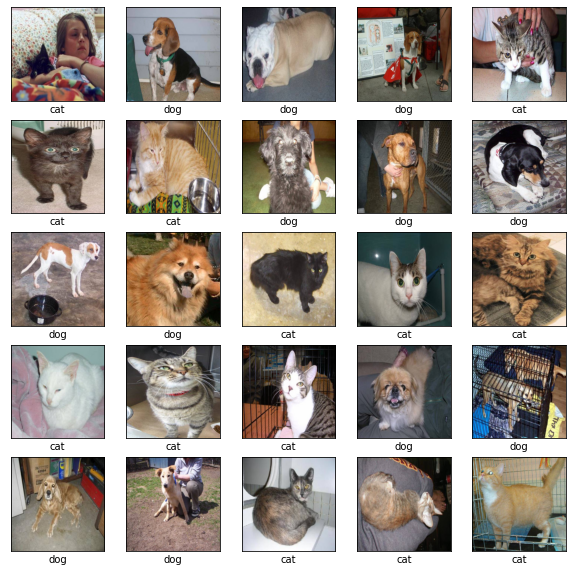

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Number of images to display
n = 25

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(10, 10))

# Iterate over the range of n
for i in range(n):
    # Create a subplot for each image
    plt.subplot(5, 5, i + 1)

    # Remove x-axis ticks
    plt.xticks([])

    # Remove y-axis ticks
    plt.yticks([])

    # Turn off grid lines
    plt.grid(False)

    # Display the image using RGB color format
    plt.imshow(cv2.cvtColor(train_images[i], cv2.COLOR_BGR2RGB))

    # Set the label for the x-axis
    plt.xlabel(train_labels[i])

# Show the plot
plt.show()



Normalizing the images

In [4]:
# Normalizing images by dividing by 255.0 to scale pixel values between 0 and 1
train_images = np.array(train_images) / 255.0

# Convert labels to numeric format
train_labels = [0 if label == 'cat' else 1 for label in train_labels]


In [5]:
#checking the shape of an image
train_images[0].shape

(350, 350, 3)

Applying principal component analysis

In [6]:
# Apply Principal Component Analysis (PCA) to reduce dimensionality
def apply_pca(images):
    """
    Applies Principal Component Analysis (PCA) to reduce the dimensionality of images.

    Args:
        images (list): List of input images.

    Returns:
        reduced_images (array): Array of reduced dimensionality images.
    """
    # Reshape images into a 2D array
    flattened_images = np.array(images).reshape(len(images), -1)

    # Create a PCA object with 100 components
    pca = PCA(n_components=100)

    # Apply PCA and reduce dimensionality of images
    reduced_images = pca.fit_transform(flattened_images)

    return reduced_images

# Apply PCA to the training images
train_images_pca = apply_pca(train_images)


splitting the dataset

In [7]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(train_images_pca, train_labels, test_size=0.2, random_state=42)


In [8]:
x_test

array([[ -19.05370446,   92.45713692,  -27.9489519 , ...,    1.91547084,
           2.20152258,    1.72124334],
       [  81.73952854,    0.31765582,   55.78954241, ...,   -0.99220642,
          -1.17493574,    1.10551255],
       [ 106.19088938,    1.61576498,    6.45569969, ...,    4.57296569,
          -0.6002161 ,    0.65466463],
       ...,
       [-112.30458817,   28.70102733,   -0.96296338, ...,   -0.12454887,
           1.81676481,    0.86208001],
       [ -10.19389347,  -50.66450309,   56.40471001, ...,   -1.28615608,
           5.92521643,    1.24904868],
       [ -23.91272715,   51.18731597,  -23.25576767, ...,   -2.60314978,
          -1.61628107,    6.81172487]])

Model training phase

In [9]:
# Create an SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(x_train, y_train)


SVC()

In [10]:
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(x_train, y_train)



RandomForestClassifier()

In [11]:
# Create an XGBoost Classifier model
xgb_model = XGBClassifier()

# Fit the model to the training data
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [12]:
# Make predictions on the test set using SVM model
svm_test_predictions = svm_model.predict(x_test)

# Make predictions on the test set using Random Forest model
rf_test_predictions = rf_model.predict(x_test)

# Make predictions on the test set using XGBoost model
xgb_test_predictions = xgb_model.predict(x_test)


In [13]:
# Evaluate the accuracy of the SVM model on the test set
svm_accuracy = accuracy_score(y_test, svm_test_predictions)

# Evaluate the accuracy of the Random Forest model on the test set
rf_accuracy = accuracy_score(y_test, rf_test_predictions)

# Evaluate the accuracy of the XGBoost model on the test set
xgb_accuracy = accuracy_score(y_test, xgb_test_predictions)



In [14]:
# Print the accuracy of the SVM model on the test set
print("SVM Accuracy:", svm_accuracy)

# Print the accuracy of the Random Forest model on the test set
print("Random Forest Accuracy:", rf_accuracy)

# Print the accuracy of the XGBoost model on the test set
print("XGBoost Accuracy:", xgb_accuracy)


SVM Accuracy: 0.5970149253731343
Random Forest Accuracy: 0.5771144278606966
XGBoost Accuracy: 0.6218905472636815


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# SVM
svm_precision = precision_score(y_test, svm_test_predictions)
svm_recall = recall_score(y_test, svm_test_predictions)
svm_f1_score = f1_score(y_test, svm_test_predictions)

# Random Forest
rf_precision = precision_score(y_test, rf_test_predictions)
rf_recall = recall_score(y_test, rf_test_predictions)
rf_f1_score = f1_score(y_test, rf_test_predictions)

# XGBoost
xgb_precision = precision_score(y_test, xgb_test_predictions)
xgb_recall = recall_score(y_test, xgb_test_predictions)
xgb_f1_score = f1_score(y_test, xgb_test_predictions)

# Now let's print these metrics
print("SVM:")
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1-Score: ", svm_f1_score)

print("\nRandom Forest:")
print("Accuracy: ", rf_accuracy)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1-Score: ", rf_f1_score)

print("\nXGBoost:")
print("Accuracy: ", xgb_accuracy)
print("Precision: ", xgb_precision)
print("Recall: ", xgb_recall)
print("F1-Score: ", xgb_f1_score)


SVM:
Accuracy:  0.5970149253731343
Precision:  0.5701754385964912
Recall:  0.6701030927835051
F1-Score:  0.6161137440758293

Random Forest:
Accuracy:  0.5771144278606966
Precision:  0.5588235294117647
Recall:  0.5876288659793815
F1-Score:  0.5728643216080402

XGBoost:
Accuracy:  0.6218905472636815
Precision:  0.6179775280898876
Recall:  0.5670103092783505
F1-Score:  0.5913978494623655


In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7],
}

# Create a new XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')



# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)



Best Hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best Score: 0.6278881987577639


Building CNN for classifying the cat and dog images

In [45]:
#loading the dataset specifically for the CNN task
from sklearn.model_selection import train_test_split
import os

# Define path to the images
path = '/Users/benjamin/Downloads/ML assignment 3/train'

# Get all file names
all_files = os.listdir(path)

# Split file names into train and test
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# Write the train and test lists to a file
with open('train_files.txt', 'w') as file:
    file.write('\n'.join(train_files))
    
with open('test_files.txt', 'w') as file:
    file.write('\n'.join(test_files))


In [46]:
# Import necessary libraries from tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

# Instantiate an ImageDataGenerator object that rescales images by 1/255
datagen = ImageDataGenerator(rescale=1./255)

def image_generator(files, batch_size = 32):
    # Generator function that yields batches of images and labels indefinitely
    while True:
        # Randomly select file paths to include in the batch
        batch_paths = np.random.choice(a=files, size=batch_size)
        batch_input = []
        batch_output = [] 

        # Loop through the file paths of the batch
        for input_path in batch_paths:
            # Load the image from the file path and resize it to (350,350)
            input = load_img(path + '/' + input_path, target_size=(350, 350))
            # If the filename contains 'dog', the label is 1, otherwise (if it contains 'cat'), it's 0
            output = int('dog' in input_path)

            # Convert the image to a numpy array
            input = img_to_array(input)
            # Apply random transformations to the image (for augmentation)
            input = datagen.random_transform(input)
            # Standardize the image (rescale pixel values)
            input = datagen.standardize(input)

            # Add the processed image and the label to their respective lists
            batch_input += [input]
            batch_output += [output]

        # Convert the lists to numpy arrays
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)

        # Yield the image and label arrays as a tuple
        yield(batch_x, batch_y)

# Usage of the image generator:
batch_size = 32
# Create a training generator that will yield training batches indefinitely
training_generator = image_generator(train_files, batch_size)
# Create a testing generator that will yield testing batches indefinitely
testing_generator = image_generator(test_files, batch_size)


In [47]:
# Import necessary libraries from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Initialize a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters of size 3x3, 'same' padding, 
# and (350, 350, 3) as the input shape for the first layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(350, 350, 3)))
model.add(Activation('relu'))  # Add a ReLU activation layer
model.add(BatchNormalization())  # Add a Batch Normalization layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Add a Max Pooling layer of size 2x2
model.add(Dropout(0.25))  # Add a Dropout layer with a dropout rate of 0.25

# Repeat the same structure of layers with 64 and then 128 filters for the Conv2D layers
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the tensor output from the previous layer
model.add(Flatten())
model.add(Dense(512))  # Add a Dense layer with 512 units
model.add(Activation('relu'))  # Add a ReLU activation layer
model.add(BatchNormalization())  # Add a Batch Normalization layer
model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 0.5

# Add a Dense output layer with 1 unit (for binary classification)
model.add(Dense(1))
model.add(Activation('sigmoid'))  # Add a sigmoid activation layer for binary classification

# Define the optimizer (Adam optimizer with learning rate 0.0001)
opt = Adam(learning_rate=0.0001)

# Compile the model with binary cross-entropy loss (for binary classification),
# the previously defined Adam optimizer, and accuracy as the evaluation metric
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [49]:
#training the model
epochs = 15

history = model.fit(training_generator, 
                    steps_per_epoch=len(train_files) // batch_size, 
                    epochs=epochs, 
                    validation_data=testing_generator, 
                    validation_steps=len(test_files) // batch_size)


Epoch 1/15
25/25 [==============================] - 99s 4s/step - loss: 0.7831 - accuracy: 0.6837 - val_loss: 1.1349 - val_accuracy: 0.5052
Epoch 2/15
25/25 [==============================] - 84s 3s/step - loss: 0.5187 - accuracy: 0.7638 - val_loss: 1.9854 - val_accuracy: 0.5104
Epoch 3/15
25/25 [==============================] - 84s 3s/step - loss: 0.4006 - accuracy: 0.8263 - val_loss: 4.7194 - val_accuracy: 0.4896
Epoch 4/15
25/25 [==============================] - 83s 3s/step - loss: 0.3296 - accuracy: 0.8650 - val_loss: 8.2934 - val_accuracy: 0.5208
Epoch 5/15
25/25 [==============================] - 80s 3s/step - loss: 0.2839 - accuracy: 0.8888 - val_loss: 12.0890 - val_accuracy: 0.4792
Epoch 6/15
25/25 [==============================] - 76s 3s/step - loss: 0.3042 - accuracy: 0.8775 - val_loss: 13.1613 - val_accuracy: 0.4740
Epoch 7/15
25/25 [==============================] - 83s 3s/step - loss: 0.1956 - accuracy: 0.9400 - val_loss: 17.1439 - val_accuracy: 0.4583
Epoch 8/15
25/25 

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 350, 350, 32)      896       
                                                                 
 activation_20 (Activation)  (None, 350, 350, 32)      0         
                                                                 
 batch_normalization_8 (Batc  (None, 350, 350, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 175, 175, 32)     0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 175, 175, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 175, 175, 64)     

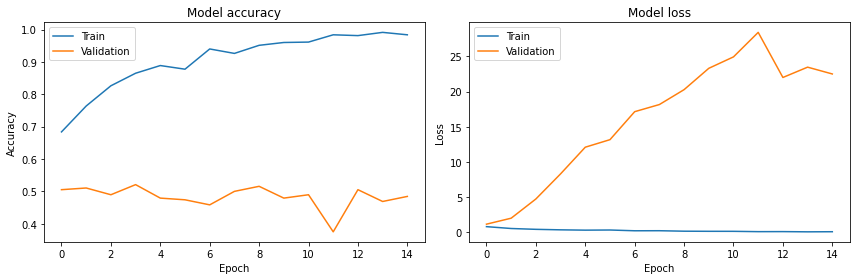

In [51]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
